A partir de un txt donde se almacenan los resultados de la validacion de los distintos modelos con distintas fuerzas y probabilidad de augmentacion.
Como resultado se espera obtener un heatmap de los modelos que mejor resultado dieron 

# Heatmap etapa 2

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
txt = 'drishti_etapa2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')



['DC_DRISHTI_augm_f-10_p-10 ', 'DC_DRISHTI_augm_f-10_p-25 ', 'DC_DRISHTI_augm_f-10_p-50 ', 'DC_DRISHTI_augm_f-10_p-75 ', 'DC_DRISHTI_augm_f-25_p-10 ', 'DC_DRISHTI_augm_f-25_p-25 ', 'DC_DRISHTI_augm_f-25_p-50 ', 'DC_DRISHTI_augm_f-25_p-75 ', 'DC_DRISHTI_augm_f-50_p-10 ', 'DC_DRISHTI_augm_f-50_p-25 ', 'DC_DRISHTI_augm_f-50_p-50 ', 'DC_DRISHTI_augm_f-50_p-75 ', 'DC_DRISHTI_augm_f-75_p-10 ', 'DC_DRISHTI_augm_f-75_p-25 ', 'DC_DRISHTI_augm_f-75_p-50 ', 'DC_DRISHTI_augm_f-75_p-75 '] 

[0.267697811126709, 0.29142245650291443, 0.2826521396636963, 0.3006460666656494, 0.27796670794487, 0.28145620226860046, 0.2839098274707794, 0.28207701444625854, 0.256136417388916, 0.24595336616039276, 0.29587897658348083, 0.3401680290699005, 0.2658293843269348, 0.31097856163978577, 0.3286125361919403, 0.3591783940792084] 

[0.8848614033733606, 0.8920152290604546, 0.8726697899011624, 0.8897021523225257, 0.881251539958557, 0.8815239304880247, 0.8758128955316055, 0.8668337152540235, 0.8837381390728923, 0.8809720414

In [39]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))
oc_mat = np.zeros((4,4))
od_mat = np.zeros((4,4))
name_mat = np.array((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.8848614  0.89201523 0.87266979 0.88970215]
 [0.88125154 0.88152393 0.8758129  0.86683372]
 [0.88373814 0.88097204 0.88577107 0.83723736]
 [0.89462347 0.88476571 0.86510406 0.82121323]]


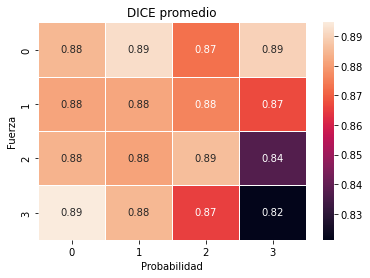

In [51]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

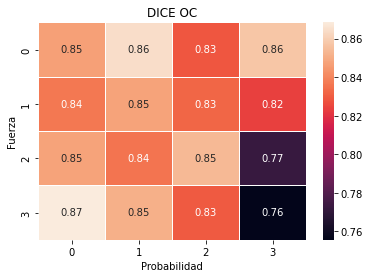

In [49]:
ax = sns.heatmap(oc_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OC')

plt.show()

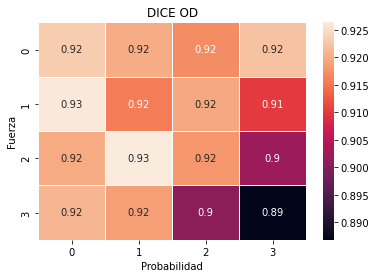

In [50]:
ax = sns.heatmap(od_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OD')

plt.show()

# Heatmap de la etapa 1


In [3]:
txt = 'drishti_etapa1_val_matrix.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['DRISHTI_augm_f-10_p-10 ', 'DRISHTI_augm_f-10_p-25 ', 'DRISHTI_augm_f-10_p-50 ', 'DRISHTI_augm_f-10_p-75 ', 'DRISHTI_augm_f-25_p-10 ', 'DRISHTI_augm_f-25_p-25 ', 'DRISHTI_augm_f-25_p-50 ', 'DRISHTI_augm_f-25_p-75 ', 'DRISHTI_augm_f-50_p-10 ', 'DRISHTI_augm_f-50_p-25 ', 'DRISHTI_augm_f-50_p-50 ', 'DRISHTI_augm_f-50_p-75 ', 'DRISHTI_augm_f-75_p-10 ', 'DRISHTI_augm_f-75_p-25 ', 'DRISHTI_augm_f-75_p-50 ', 'DRISHTI_augm_f-75_p-75 '] 

[0.013126589357852936, 0.01271850150078535, 0.01077883318066597, 0.015358026139438152, 0.015299543738365173, 0.013217130675911903, 0.01388532668352127, 0.014742945320904255, 0.009913768619298935, 0.011896814219653606, 0.01470374595373869, 0.012851744890213013, 0.015983402729034424, 0.01072628516703844, 0.015633083879947662, 0.0174972303211689] 

[0.9086440888569809, 0.9088057177150963, 0.91574192828863, 0.8951466810869271, 0.8974952245150527, 0.9024890270917322, 0.8923872516106913, 0.9017020208730052, 0.9280955998363817, 0.916526285216381, 0.8974451675102435,

In [4]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

NameError: name 'np' is not defined

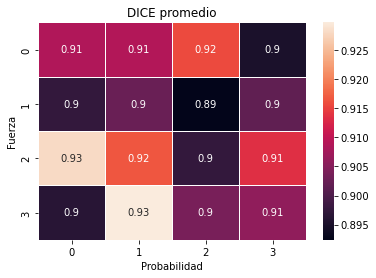

In [58]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

# REFUGE STEP 1


In [21]:
txt= 'REFUGE_augm_matrix.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l,avg_dice = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['DRISHTI_augm_f-10_p-10 ', 'DRISHTI_augm_f-10_p-25 ', 'DRISHTI_augm_f-10_p-50 ', 'DRISHTI_augm_f-10_p-75 ', 'DRISHTI_augm_f-25_p-10 ', 'DRISHTI_augm_f-25_p-25 ', 'DRISHTI_augm_f-25_p-50 ', 'DRISHTI_augm_f-25_p-75 ', 'DRISHTI_augm_f-50_p-10 ', 'DRISHTI_augm_f-50_p-25 ', 'DRISHTI_augm_f-50_p-50 ', 'DRISHTI_augm_f-50_p-75 ', 'DRISHTI_augm_f-75_p-10 ', 'DRISHTI_augm_f-75_p-25 ', 'DRISHTI_augm_f-75_p-50 ', 'DRISHTI_augm_f-75_p-75 '] 

[0.0075796800665557384, 0.0056934780441224575, 0.00814143754541874, 0.005253493320196867, 0.00536578381434083, 0.004948048386722803, 0.004617221187800169, 0.004113148897886276, 0.0056990464217960835, 0.0053804838098585606, 0.004423865582793951, 0.005642063915729523, 0.005021377000957727, 0.004614281002432108, 0.005435984581708908, 0.004960998427122831] 

[0.9319415333897026, 0.9398797642190607, 0.9228598990739674, 0.942477922736285, 0.9405982146765558, 0.9438031767109203, 0.9489473661383397, 0.9526243478126214, 0.9314707191051036, 0.93831424458064, 0.94754860

In [22]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.93194153 0.93987976 0.9228599  0.94247792]
 [0.94059821 0.94380318 0.94894737 0.95262435]
 [0.93147072 0.93831424 0.9475486  0.93308409]
 [0.94087417 0.94654282 0.93629898 0.94381225]]


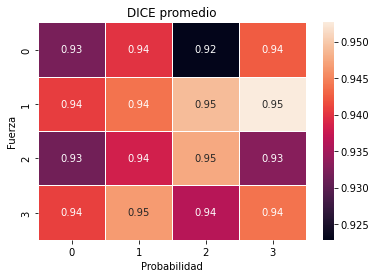

In [23]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

# REFUGE STEP 2


In [36]:
txt = 'REFUGE_AUGM_S2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))

dice_avg.insert(10,0.0)
loss.insert(10,0.0)
dice_oc.insert(10,0.0)
dice_od.insert(10,0.0)

dice_avg.insert(12,0.0)
loss.insert(12,0.0)
dice_oc.insert(12,0.0)
dice_od.insert(12,0.0)

dice_avg.insert(13,0.0)
loss.insert(13,0.0)
dice_oc.insert(13,0.0)
dice_od.insert(13,0.0)

dice_avg.insert(14,0.0)
loss.insert(14,0.0)
dice_oc.insert(14,0.0)
dice_od.insert(14,0.0)

dice_avg.insert(15,0.0)
loss.insert(15,0.0)
dice_oc.insert(15,0.0)
dice_od.insert(15,0.0)

print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')

['DC_REFUGE_augm_f-10_p-10 ', 'DC_REFUGE_augm_f-10_p-25 ', 'DC_REFUGE_augm_f-10_p-50 ', 'DC_REFUGE_augm_f-10_p-75 ', 'DC_REFUGE_augm_f-25_p-10 ', 'DC_REFUGE_augm_f-25_p-25 ', 'DC_REFUGE_augm_f-25_p-50 ', 'DC_REFUGE_augm_f-25_p-75 ', 'DC_REFUGE_augm_f-50_p-10 ', 'DC_REFUGE_augm_f-50_p-25 ', 'DC_REFUGE_augm_f-50_p-75 '] 

[0.23815207183361053, 0.2011643499135971, 0.19226647913455963, 0.18379077315330505, 0.17025145888328552, 0.14967024326324463, 0.12186571955680847, 0.1269254833459854, 0.4564001262187958, 0.14670290052890778, 0.0, 0.1451556384563446, 0.0, 0.0, 0.0, 0.0] 

[0.8930995347946299, 0.908339508278091, 0.911893197383628, 0.9118211589125821, 0.9156732389413732, 0.9240788659241735, 0.9397005541616938, 0.9370126857545674, 0.7279030623426, 0.9267776128700023, 0.0, 0.9274807648429766, 0.0, 0.0, 0.0, 0.0] 

[0.9312863366008354, 0.9438327216945558, 0.943401561051748, 0.934856846182615, 0.9353755495155066, 0.9563130635981986, 0.9610296246909624, 0.9598460075098493, 0.808450989409167, 0.

In [37]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))
oc_mat = np.zeros((4,4))
od_mat = np.zeros((4,4))
name_mat = np.array((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.89309953 0.90833951 0.9118932  0.91182116]
 [0.91567324 0.92407887 0.93970055 0.93701269]
 [0.72790306 0.92677761 0.         0.92748076]
 [0.         0.         0.         0.        ]]


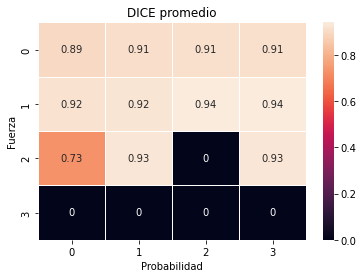

In [38]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

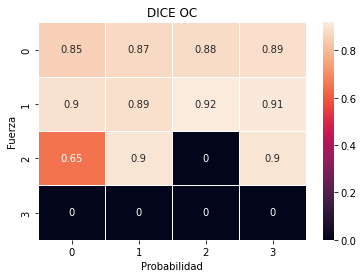

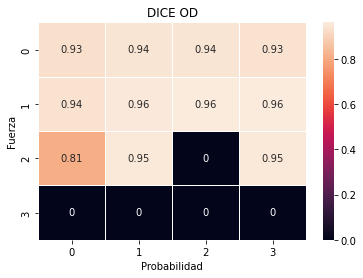

In [39]:
ax = sns.heatmap(oc_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OC')

plt.show()

ax = sns.heatmap(od_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OD')

plt.show()

# MULTIDATASET STEP 1


In [29]:
txt= 'matrix_augm_multiS1.txt'
name = []
loss = []
dice_avg = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l,avg_dice = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    l = (l.split(':')[1]).replace('}]\n','')
    loss.append(float(l))
print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')

['step1_multi__augm_f-10_p-10 ', 'step1_multi__augm_f-10_p-25 ', 'step1_multi__augm_f-10_p-50 ', 'step1_multi__augm_f-10_p-75 ', 'step1_multi__augm_f-25_p-10 ', 'step1_multi__augm_f-25_p-25 ', 'step1_multi__augm_f-25_p-50 ', 'step1_multi__augm_f-25_p-75 ', 'step1_multi__augm_f-50_p-10 ', 'step1_multi__augm_f-50_p-25 ', 'step1_multi__augm_f-50_p-50 ', 'step1_multi__augm_f-50_p-75 ', 'step1_multi__augm_f-75_p-10 ', 'step1_multi__augm_f-75_p-25 ', 'step1_multi__augm_f-75_p-50 ', 'step1_multi__augm_f-75_p-75 '] 

[0.008599448017776012, 0.006176346447318792, 0.006370531395077705, 0.006168137304484844, 0.006090919952839613, 0.006191365886479616, 0.006408827379345894, 0.005735896527767181, 0.007465049624443054, 0.006671549752354622, 0.005460033193230629, 0.005990068428218365, 0.006426031235605478, 0.0063213384710252285, 0.005543212406337261, 0.006587187293916941] 

[0.9505956006910081, 0.9517611930527625, 0.9531747901326327, 0.9531740863188248, 0.9537328083520971, 0.9565057619794819, 0.947922

[[0.9505956  0.95176119 0.95317479 0.95317409]
 [0.95373281 0.95650576 0.94792204 0.95413545]
 [0.95227021 0.95353442 0.95386037 0.95106255]
 [0.94338771 0.95418422 0.95373377 0.94703049]]


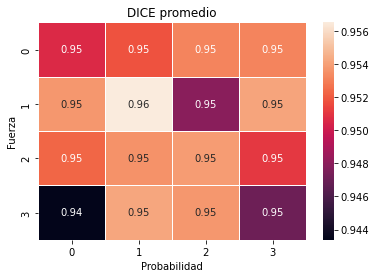

In [30]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

# MULTIDATASET STEP 2


In [31]:
txt = 'MULTI_AUGM_S2.txt'
name = []
loss = []
dice_avg = []
dice_od = []
dice_oc = []
with open(txt) as f:
    lines = f.readlines()
    #print(lines)
for l in lines:
    n,metrics = l.split('[{')
    name.append(n)
    dice, l, oc, od = metrics.split(',')
    dice_avg.append(float(dice.split(':')[1]))
    loss.append(float(l.split(':')[1]))
    dice_oc.append(float(oc.split(':')[1]))
    dice_od.append(float((od.split(':')[1]).replace('}]','')))

dice_avg.insert(8,0.0)
loss.insert(8,0.0)
dice_oc.insert(8,0.0)
dice_od.insert(8,0.0)

dice_avg.insert(12,0.0)
loss.insert(12,0.0)
dice_oc.insert(12,0.0)
dice_od.insert(12,0.0)

dice_avg.insert(13,0.0)
loss.insert(13,0.0)
dice_oc.insert(13,0.0)
dice_od.insert(13,0.0)

dice_avg.insert(14,0.0)
loss.insert(14,0.0)
dice_oc.insert(14,0.0)
dice_od.insert(14,0.0)

dice_avg.insert(15,0.0)
loss.insert(15,0.0)
dice_oc.insert(15,0.0)
dice_od.insert(15,0.0)

print(name, '\n')
print(loss, '\n')
print(dice_avg, '\n')
print(dice_od, '\n')
print(dice_oc, '\n')

['Step2_multi_augm_f-10_p-10 ', 'Step2_multi_augm_f-10_p-25 ', 'Step2_multi_augm_f-10_p-50 ', 'Step2_multi_augm_f-10_p-75 ', 'Step2_multi_augm_f-25_p-10 ', 'Step2_multi_augm_f-25_p-25 ', 'Step2_multi_augm_f-25_p-50 ', 'Step2_multi_augm_f-25_p-75 ', 'Step2_multi_augm_f-50_p-25 ', 'Step2_multi_augm_f-50_p-50 ', 'Step2_multi_augm_f-50_p-75 '] 

[0.12418945878744125, 0.15683822333812714, 0.1148814931511879, 0.10509036481380463, 0.11017058044672012, 0.11596892774105072, 0.0991385206580162, 0.10386061668395996, 0.0, 0.11023818701505661, 0.10688504576683044, 0.10736790299415588, 0.0, 0.0, 0.0, 0.0] 

[0.944845061782041, 0.9422439645561755, 0.9451601623636872, 0.9447456332416216, 0.9465212704434961, 0.9485335613206113, 0.9508237013535975, 0.9508978770534278, 0.0, 0.949859896662741, 0.950861287911501, 0.9488427240597963, 0.0, 0.0, 0.0, 0.0] 

[0.9670480967824472, 0.9639874941749511, 0.9674667228803903, 0.9683424016639552, 0.9664898617738392, 0.965726127475802, 0.9693987497209177, 0.967478544733

In [32]:
fuerza = [10,25,50,75]
prob = [10,25,50,75]

loss_mat = np.zeros((4,4))
dice_mat = np.zeros((4,4))
oc_mat = np.zeros((4,4))
od_mat = np.zeros((4,4))
name_mat = np.array((4,4))

pos = 0
#aumenta primero probabilidad y despues fuerza
for f in range(len(fuerza)):
    for p in range(len(prob)):
        #print('pos',pos, len(loss))
        #print('pos matrix: ', f,p)

        loss_mat[f,p] = loss[pos]
        dice_mat[f,p] = dice_avg[pos]
        oc_mat[f,p] = dice_oc[pos]
        od_mat[f,p] = dice_od[pos]
        #new_name = name[pos].replace('DC_DRISHTI_augm_','')
        #print(new_name)
        #name_mat[f,p] = new_name

        pos = pos + 1
print(dice_mat)

[[0.94484506 0.94224396 0.94516016 0.94474563]
 [0.94652127 0.94853356 0.9508237  0.95089788]
 [0.         0.9498599  0.95086129 0.94884272]
 [0.         0.         0.         0.        ]]


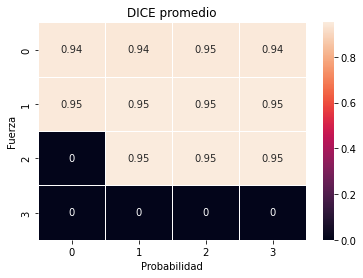

In [33]:
ax = sns.heatmap(dice_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE promedio')
#xtickslabels

plt.show()

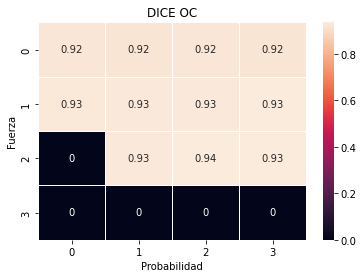

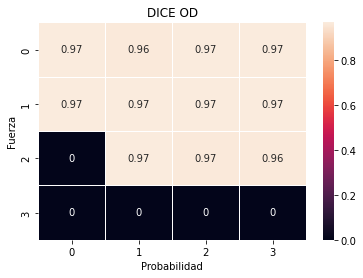

In [35]:
ax = sns.heatmap(oc_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OC')

plt.show()

ax = sns.heatmap(od_mat, annot=True, linewidth=0.5)
ax.set_xlabel("Probabilidad")
ax.set_ylabel("Fuerza")
ax.set_title('DICE OD')

plt.show()